<a href="https://colab.research.google.com/github/sbbwoy/ESAA/blob/main/%ED%85%90%EC%84%9C%ED%94%8C%EB%A1%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#텐서플로

In [ ]:
import tensorflow as tf
tf.executing_eagerly() #즉시 실행

True

In [ ]:
a, b = 1, 2
c= tf.math.add(a, b)
c

<tf.Tensor: shape=(), dtype=int32, numpy=3>

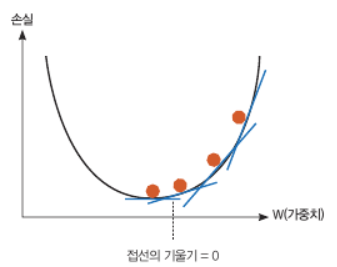

텐서플로는 복잡한 미분을 자동 처리 --> 손실함수의 최솟값을 찾아줌

## 03 텐서플로 자료구조

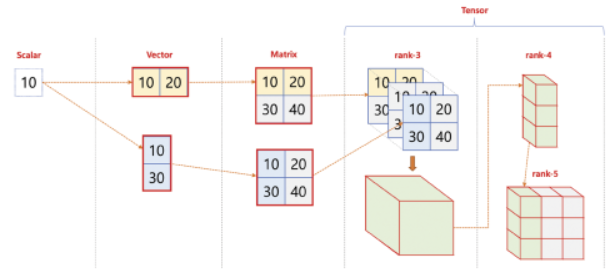

In [ ]:
#스칼라 정의
a = tf.constant(1)
b = tf.constant(2)
print('a:', a)
print('b:', b)

a: tf.Tensor(1, shape=(), dtype=int32)
b: tf.Tensor(2, shape=(), dtype=int32)


In [ ]:
tf.rank(a)

<tf.Tensor: shape=(), dtype=int32, numpy=0>

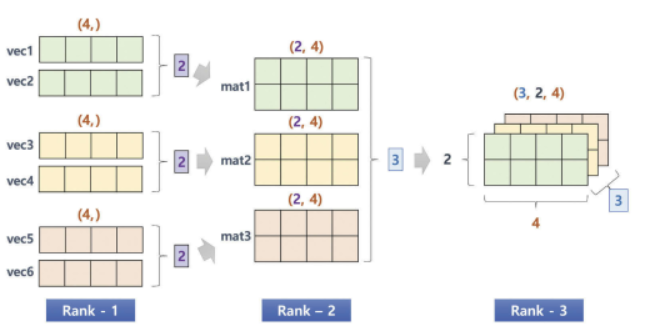

In [ ]:
import numpy as np

#2차원 배열 정의
mat1 = [[1,2,3,4],
        [5,6,7,8]]
mat2 = [[9,10,11,12],
        [13,14,15,16]]
mat3 = [[17,18,19,20],
        [21,22,23,24]]

#텐서 변환 - constant 함수에 3차원 배열 입력
tensor1 = tf.constant([mat1, mat2, mat3])

#랭크 확인
print('rank: ', tf.rank(tensor1))

#텐서 출력
print('tensor1: ', tensor1)

rank:  tf.Tensor(3, shape=(), dtype=int32)
tensor1:  tf.Tensor(
[[[ 1  2  3  4]
  [ 5  6  7  8]]

 [[ 9 10 11 12]
  [13 14 15 16]]

 [[17 18 19 20]
  [21 22 23 24]]], shape=(3, 2, 4), dtype=int32)


In [ ]:
#텐서 변환 - stack 함수로 2차원 배열을 위아래로 쌓기
tensor2 = tf.stack([mat1, mat2, mat3])

#랭크 확인
print('rank: ', tf.rank(tensor2))

#텐서 출력
print('tensor2: ', tensor2)

rank:  tf.Tensor(3, shape=(), dtype=int32)
tensor2:  tf.Tensor(
[[[ 1  2  3  4]
  [ 5  6  7  8]]

 [[ 9 10 11 12]
  [13 14 15 16]]

 [[17 18 19 20]
  [21 22 23 24]]], shape=(3, 2, 4), dtype=int32)


In [ ]:
#랭크-4 텐서 만들기
tensor4 = tf.stack([tensor1, tensor2])

#랭크 확인
print('rank: ', tf.rank(tensor4))

#텐서 출력
print('tensor2: ', tensor4)     #shape = (2,3,2,4)

rank:  tf.Tensor(4, shape=(), dtype=int32)
tensor2:  tf.Tensor(
[[[[ 1  2  3  4]
   [ 5  6  7  8]]

  [[ 9 10 11 12]
   [13 14 15 16]]

  [[17 18 19 20]
   [21 22 23 24]]]


 [[[ 1  2  3  4]
   [ 5  6  7  8]]

  [[ 9 10 11 12]
   [13 14 15 16]]

  [[17 18 19 20]
   [21 22 23 24]]]], shape=(2, 3, 2, 4), dtype=int32)


과소적합 vs. 과대적합

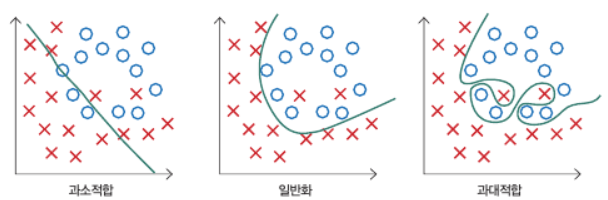

1-1-3
epoch: 딥러닝 모델이 반복 훈련을 할 때 데이터셋을 전부 학습에 사용하는 1회의 훈련 루프. 

사전에 설정한 최대 epoch까지 학습이 끝나더라도 모델이 과소적합되었다고 판단 시 epoch을 늘려 다시 학습할 필요가 있음. 

과대적합 시에는 epoch을 줄여 조기 종료할 필요.

1-1-4 손실함수(loss function)

지도학습 분류문제의 손실함수

1. 이진 분류 -> binary_crossentropy
2. 다중 분류 -> categorical_crossentropy (클래스가 원핫 벡터인 경우에만) / 아닐 시 sparse_categorical_crossentropy

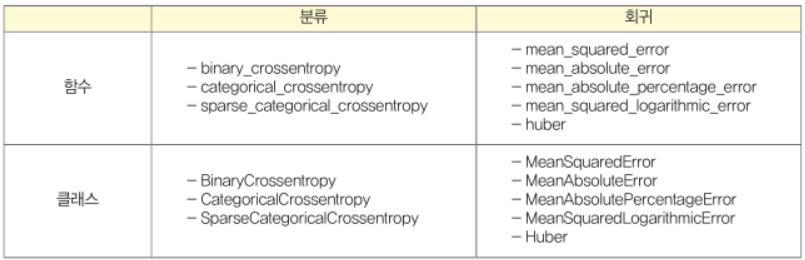

In [ ]:
import tensorflow as tf

# 클래스
tf.keras.losses.BinaryCrossentropy()

# 함수
tf.keras.losses.binary_crossentropy

<function keras.losses.binary_crossentropy>

1-1-5 경사하강법(gradient descent)

모델 내부의 가중치(weight)에 대한 미분 값을 구하고 목적 함수 값이 낮아지는 방향으로 차감하면서 최소 함수값을 갖도록 하는 방법

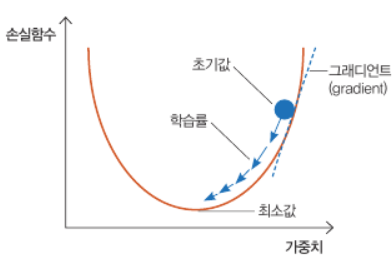

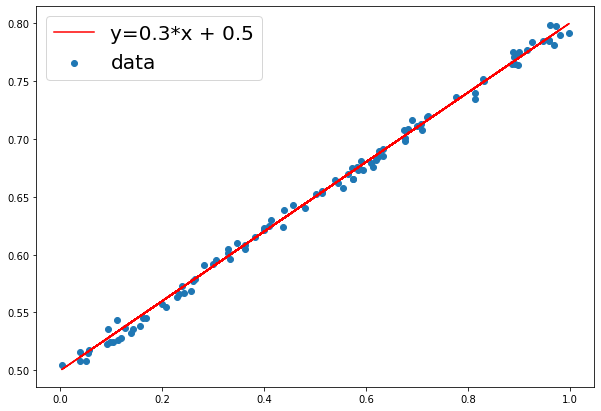

w: 0.3, b: 0.5


In [ ]:
import matplotlib.pyplot as plt

#샘플에 활용할 데이터셋 만들기
def make_linear(w=0.5, b=0.8, size=50, noise=1.0):
    x = np.random.rand(size)
    y = w*x+b
    noise = np.random.uniform(-abs(noise), abs(noise), size=y.shape)
    yy = y+ noise
    plt.figure(figsize=(10,7))
    plt.plot(x, y, color = 'r', label = f'y={w}*x + {b}')
    plt.scatter(x, yy, label='data')
    plt.legend(fontsize=20)
    plt.show()
    print(f'w: {w}, b: {b}')
    return x, yy

x, y = make_linear(0.3, 0.5, 100, 0.01)

gradient는 손실함수의 w, b에 대한 각각의 편미분 값을 구한 뒤 학습률 계수를 곱해 이전 w, b로부터 차감

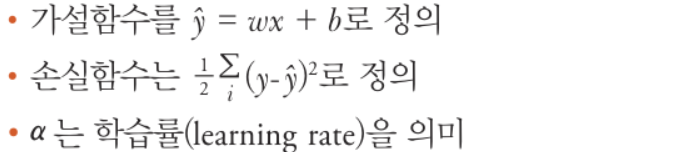

w(new) = w - aΔw = w - Δw = w - a*sigma(y-y_hat)(x)

b(new) = b - aΔb = b - a*sigma(y-y_hat)

In [ ]:
#최대 반복 횟수
num_epoch = 1000

#학습률(learning_rate)
learning_rate = 0.005

#에러 기록
errors = []

#random한 값으로 w, b를 초기화 
w = np.random.uniform(low=0.0, high=1.0)
b = np.random.uniform(low=0.0, high=1.0)

for epoch in range(num_epoch):
    #hypothesis 정의
    y_hat = w*x+b

    #loss function 정의
    error = 0.5 *((y_hat - y) ** 2).sum()
    if error < 0.005: break

    #gradient 미분 계산
    w = w - learning_rate *((y_hat - y) * x).sum()
    b = b - learning_rate *(y_hat - y).sum()

    errors.append(error)

    if epoch % 5==0:
        print('{0:2} w = {1:.5f}, b = {2:.5f} error = {3:.5f}'.format(epoch, w, b, error))

print('------' * 15)
print('{0:2} w = {1:.1f}, b = {2:.1f} error = {3:.5f}'.format(epoch, w, b, error))    

 0 w = 0.68111, b = 0.32828 error = 1.03359
 5 w = 0.61114, b = 0.33199 error = 0.43044
10 w = 0.56381, b = 0.35726 error = 0.30908
15 w = 0.52379, b = 0.37881 error = 0.22205
20 w = 0.48991, b = 0.39706 error = 0.15962
25 w = 0.46121, b = 0.41252 error = 0.11484
30 w = 0.43691, b = 0.42561 error = 0.08272
35 w = 0.41632, b = 0.43670 error = 0.05968
40 w = 0.39889, b = 0.44609 error = 0.04316
45 w = 0.38412, b = 0.45405 error = 0.03131
50 w = 0.37162, b = 0.46078 error = 0.02280
55 w = 0.36103, b = 0.46649 error = 0.01670
60 w = 0.35206, b = 0.47132 error = 0.01233
65 w = 0.34446, b = 0.47541 error = 0.00919
70 w = 0.33803, b = 0.47887 error = 0.00694
75 w = 0.33258, b = 0.48181 error = 0.00533
------------------------------------------------------------------------------------------
77 w = 0.3, b = 0.5 error = 0.00482


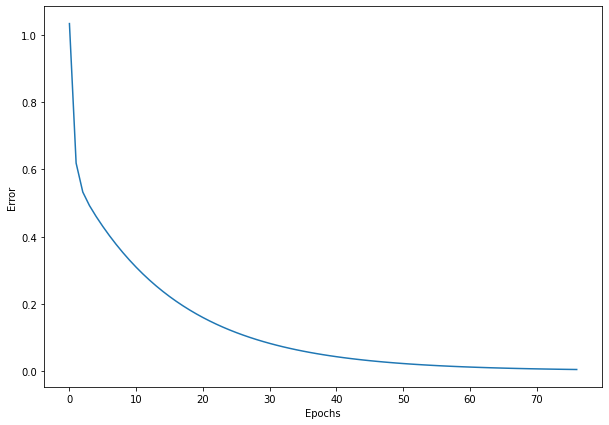

In [ ]:
plt.figure(figsize=(10, 7))
plt.plot(errors)
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.show()

뉴런: 인공 신경망 모델을 구성하는 하나의 신경. 뉴런 -> 레이어 -> 신경망

뉴런 내부에는 가중치가 존재. 모델 훈련 진행 중에 오차 역전파를 통해 뉴런의 가중치가 업데이트.

* 역전파 알고리즘: 신경망 모델의 파라미터들에 대한 그래디언트를 계산하는 방법
* 역전파: 신경망을 구성하는 각 레이어와 관련된 손실함수를 미분한 결과인 그래디언트를 출력층에서 입력층 순으로 역으로 계산하고 저장

Dense 레이어: 심층 신경망 모델을 구성하는 가장 기본 레이어. 입력 레이어 1개(3개 뉴런), 은닉 레이어 2개, 출력 레이어 1개(1개 뉴런) 구성.

**완전 연결층**

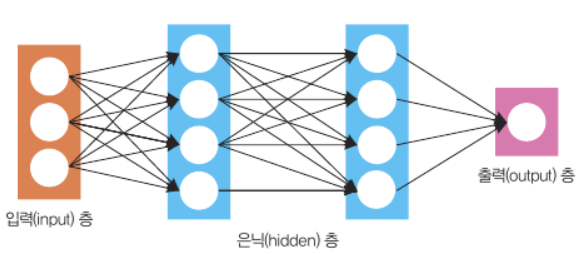

모든 뉴런들이 정보(텐서)의 흐름을 나타내는 화살표로 연결되어 있어 완전연결층이라 정의

In [ ]:
#10개의 노드로 이루어진 Dense 레이어
tf.keras.layers.Dense(10)

#ReLU 활성화 함수 적용
tf.keras.layers.Dense(10, activation='relu')

2-5-1 모델 구조

In [ ]:
#리스트형
model = tf.keras.Sequential([
        tf.keras.layers.Dense(10),
        tf.keras.layers.Dense(5),
        tf.keras.layers.Dense(1)
])

#add 함수로 레이어 추가
#model = tf.keras.Sequential()
#model.add(tf.keras.layers.Dense(10))
#model.add(tf.keras.layers.Dense(5))
#model.add(tf.keras.layers.Dense(1))

In [ ]:
model = tf.keras.Sequential([
        #입력 데이터의 shape=(150, 4)인 경우 input_shape 지정
        tf.keras.layers.Dense(10, input_shape=[4]), # input_shape=(4,)
        tf.keras.layers.Dense(5),
        tf.keras.layers.Dense(1)
])

In [ ]:
#단순선형회귀 모델 생성
model = tf.keras.Sequential([
        tf.keras.layers.Dense(1, input_shape=[1])
])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


업데이트 파라미터인 가중치 w와 편향 b 두 개로 총 파라미터의 개수가 2개로 표기됨

2-7 컴파일

- optimizer
- loss
- metircs

등을 정의하는데, 클래스 인스턴스, 함수, 사전 정의된 문자열로 지정할 수 있음.

클래스 인스턴스로 지정할 경우 학습률(learning rate), 모멘텀(momentum) 등의 하이퍼 파라미터를 지정할 수 있음.

문자열로 지정하는 경우엔 하이퍼 파라미터 수정이 어려움.

In [ ]:
#긴 문자열 지정
model.compile(optimizer='sgd', loss='mean_squared_error', metrics=['mean_squared_error', 'mean_absolute_error'])
#짧은 문자열 지정
model.compile(optimizer='sgd', loss='mse', metrics=['mse', 'mae'])
#클래스 인스턴스 지정
model.compile(optimizer=tf.keras.optimizers.SGD(lr=0.005),
              loss=tf.keras.losses.MeanAbsoluteError(),
              metrics=[tf.keras.metrics.MeanAbsoluteError(),
                       tf.keras.metrics.MeanSquaredError()
                       ])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [ ]:
#컴파일
model.compile(optimizer='sgd', loss='mse', metrics=['mae']) #평균절대오차 mae

In [ ]:
model.fit(x, y, epochs=5)

Epoch 1/5
4/4 [==============================] - 1s 4ms/step - loss: 0.1396 - mae: 0.3194
Epoch 2/5
4/4 [==============================] - 0s 3ms/step - loss: 0.1341 - mae: 0.3141
Epoch 3/5
4/4 [==============================] - 0s 4ms/step - loss: 0.1287 - mae: 0.3088
Epoch 4/5
4/4 [==============================] - 0s 4ms/step - loss: 0.1259 - mae: 0.3057
Epoch 5/5
4/4 [==============================] - 0s 3ms/step - loss: 0.1206 - mae: 0.2998


In [ ]:
x = np.arange(1, 6)
y = 3*x+2
x, y

(array([1, 2, 3, 4, 5]), array([ 5,  8, 11, 14, 17]))

In [ ]:
#단순 선형회귀 모델 생성
model = tf.keras.Sequential([
        tf.keras.layers.Dense(1, input_shape=[1])
])

#컴파일
model.compile(optimizer='sgd', loss='mse', metrics=['mae'])

#훈련
history = model.fit(x, y, epochs=1200)

Epoch 1/1200
1/1 [==============================] - 0s 287ms/step - loss: 76.6226 - mae: 8.2438
Epoch 2/1200
1/1 [==============================] - 0s 7ms/step - loss: 44.7825 - mae: 6.3453
Epoch 3/1200
1/1 [==============================] - 0s 7ms/step - loss: 26.2267 - mae: 4.8958
Epoch 4/1200
1/1 [==============================] - 0s 6ms/step - loss: 15.4125 - mae: 3.7891
Epoch 5/1200
1/1 [==============================] - 0s 9ms/step - loss: 9.1096 - mae: 2.9442
Epoch 6/1200
1/1 [==============================] - 0s 5ms/step - loss: 5.4357 - mae: 2.2989
Epoch 7/1200
1/1 [==============================] - 0s 6ms/step - loss: 3.2939 - mae: 1.8062
Epoch 8/1200
1/1 [==============================] - 0s 6ms/step - loss: 2.0449 - mae: 1.4299
Epoch 9/1200
1/1 [==============================] - 0s 10ms/step - loss: 1.3162 - mae: 1.1425
Epoch 10/1200
1/1 [==============================] - 0s 14ms/step - loss: 0.8908 - mae: 0.9229
Epoch 11/1200
1/1 [==============================] - 0s 10ms/

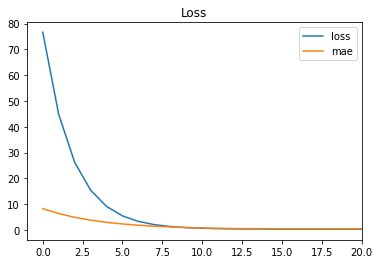

In [ ]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['mae'], label='mae')
plt.xlim(-1, 20)
plt.title('Loss')
plt.legend()
plt.show()

In [ ]:
#검증
model.evaluate(x, y)

1/1 [==============================] - 0s 250ms/step - loss: 9.3905e-05 - mae: 0.0083


[9.390486229676753e-05, 0.00831756554543972]

In [ ]:
#예측
model.predict([10])

array([[32.0402]], dtype=float32)

##3-1 케라스 내장 데이터셋 로드

In [ ]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


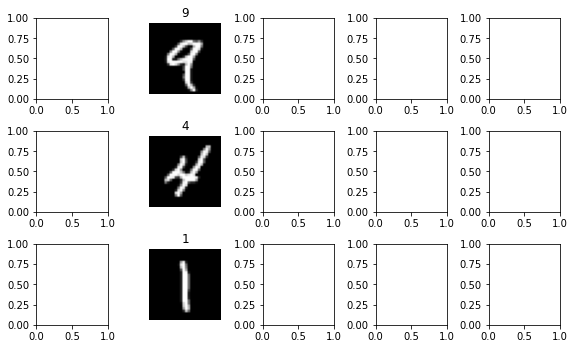

In [ ]:
fig, axes = plt.subplots(3, 5)
fig.set_size_inches(8, 5)

for i in range(15):
    ax = axes[i//5, 1%5]
    ax.imshow(x_train[i], cmap='gray')
    ax.axis('off')
    ax.set_title(str(y_train[i]))

plt.tight_layout()
plt.show()

3-4 활성화 함수

입력을 비선형 출력으로 변환하는 함수. 선형관계를 나타내는 함수에 비선형성을 추가하는 방법으로 표현되기도 함.

ex. Sigmoid, Hyperbolic Tangent(or tanh), ReLU(Rectified Unit), Leaky ReLU etc.

3-5 입력과 출력

첫번째 레이어에 input_shape 매개변수를 지정하는 것이 일반적

가장 마지막 레이어는 출력층으로, 출력층의 노드 개수는 반드시 분류해야 할 클래스의 개수와 동일해야 함.

In [ ]:
model = tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=(28, 28)),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(32, activation='relu'),
        #노드 = 10개 (클래스 개수와 동일)
        tf.keras.layers.Dense(10, activation='softmax'),
])

256+64+32+10=784, 총 784개의 변수에 대한 입력값을 노드 개수를 조금씩 줄여가면서 최종 출력 클래스 개수인 10개까지 정보를 축약하기 위한 설계

출력층의 노드 개수가 2개 이상인 경우**(다중분류)**에는 softmax 활성화 함수를 적용

이진분류 모델의 출력층 노드 개수를 1개로 설정한 경우에는 sigmoid 를 적용하는 편. (단, 출력 레이어의 클래스를 원핫 인코딩으로 변환해 노드 개수가 2개인 경우에는 softmax)

In [ ]:
#tf.keras.layers.Dense(1, activation='sigmoid')

#tf.keras.layers.Dense(10, activation='softmax')

3-6 손실함수

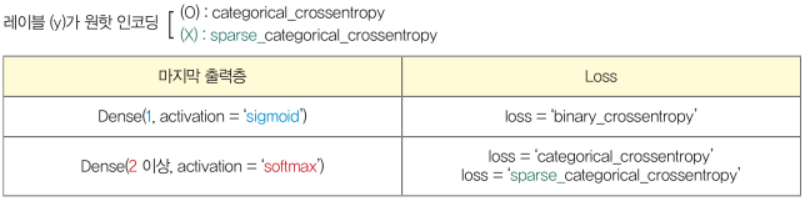

3-7 옵티마이저Optimizer

손실을 낮추기 위해, 신경망의 가중치와 학습률과 같은 신경망의 속성을 변경하는 데 사용되는 최적화 방법

* SGD
* Adam
* Adagrad
* Nadam
* RMSprop
* Adadelta
* Adamax
* Ftrl

In [ ]:
#클래스 인스턴스로 지정
adam = tf.keras.optimizers.Adam(lr=0.001)
model.compile(optimizer=adam)

#문자열로 지정
model.compile(optimizer='adam')

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)
